In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

In [13]:
df=pd.read_csv("D:\jupiter\diabetes.csv")

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.shape

(768, 9)

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
#finding diabetic and non diabetic 
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [18]:
#o=> non-diabetic   1=> non-diabetic
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [19]:
df.isnull().sum()   ##checking missing value

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
##cheacking the 0 values
df[df['Glucose']== 0].shape[0]

5

In [21]:
df[df['BloodPressure']== 0].shape[0]

35

In [22]:
df[df['SkinThickness']== 0].shape[0]

227

In [23]:
df[df['Insulin']== 0].shape[0]

374

In [24]:
df[df['BMI']== 0].shape[0]

11

In [25]:
##repleacing zero with mean values of that colimn
df['Glucose']= df['Glucose'].replace(0,df['Glucose'].mean())
df[df['Glucose']== 0].shape[0]

0

In [26]:
df['BloodPressure']= df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df[df['BloodPressure']== 0].shape[0]

0

In [27]:
df['SkinThickness']= df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']= df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']= df['BMI'].replace(0,df['BMI'].mean())

In [28]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

In [29]:
X= df.drop(columns = 'Outcome', axis=1)  ##dropping a column axis=1,dropping a row axis=0
Y= df['Outcome']

In [30]:
##data standardization in particular range with standard scaler
scaler = StandardScaler()
new_X = scaler.fit_transform(X)    ####adjust all the values in 0 to 1

In [31]:
X= new_X
Y= df['Outcome']

In [32]:
print(X)

[[ 0.63994726  0.86527574 -0.0210444  ...  0.16725546  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20598931 -0.51658286 ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01597855 -0.68176235 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02240928 -0.0210444  ... -0.90975111 -0.68519336
  -0.27575966]
 [-0.84488505  0.14197684 -1.01212132 ... -0.34213954 -0.37110101
   1.17073215]
 [-0.84488505 -0.94297153 -0.18622389 ... -0.29847711 -0.47378505
  -0.87137393]]


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analysis with graphs

-ve(0):  500
+ve(1):  268


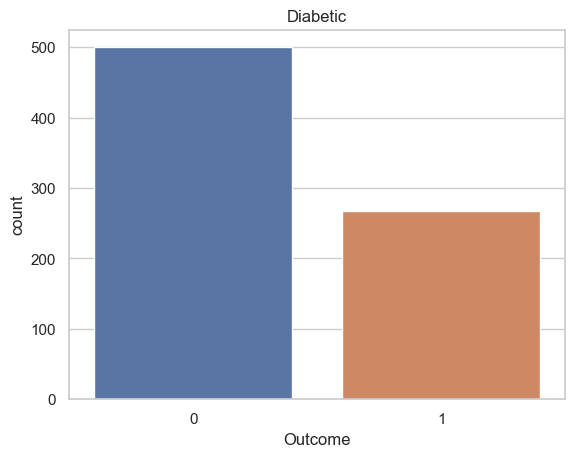

In [34]:
##countplot
sns.set_theme(style="whitegrid")
sns.countplot(x=df["Outcome"])
N,P = df['Outcome'].value_counts()
plt.title('Diabetic')
print('-ve(0): ',N)
print('+ve(1): ',P)
plt.show()

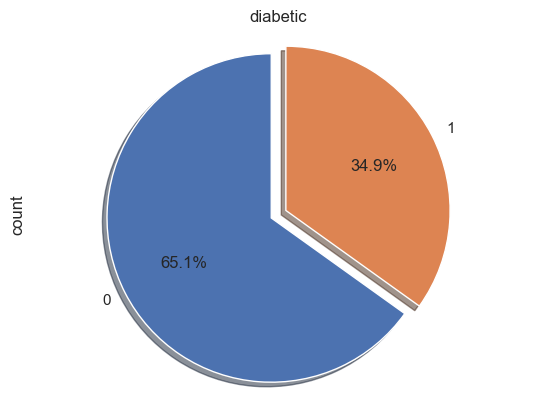

In [35]:
##pie plot
df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0,0.1,], shadow=True, startangle=90)
plt.title('diabetic')
plt.axis('equal')
plt.show()

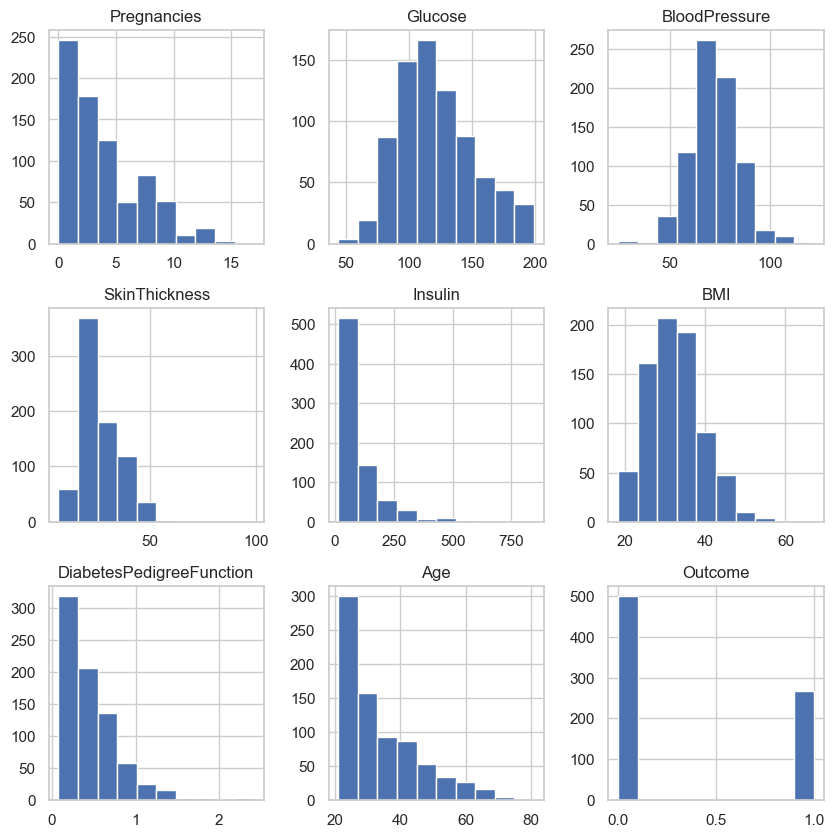

In [36]:
##Histogram of Each feature
df.hist(bins=10,figsize=(10,10))
plt.show()

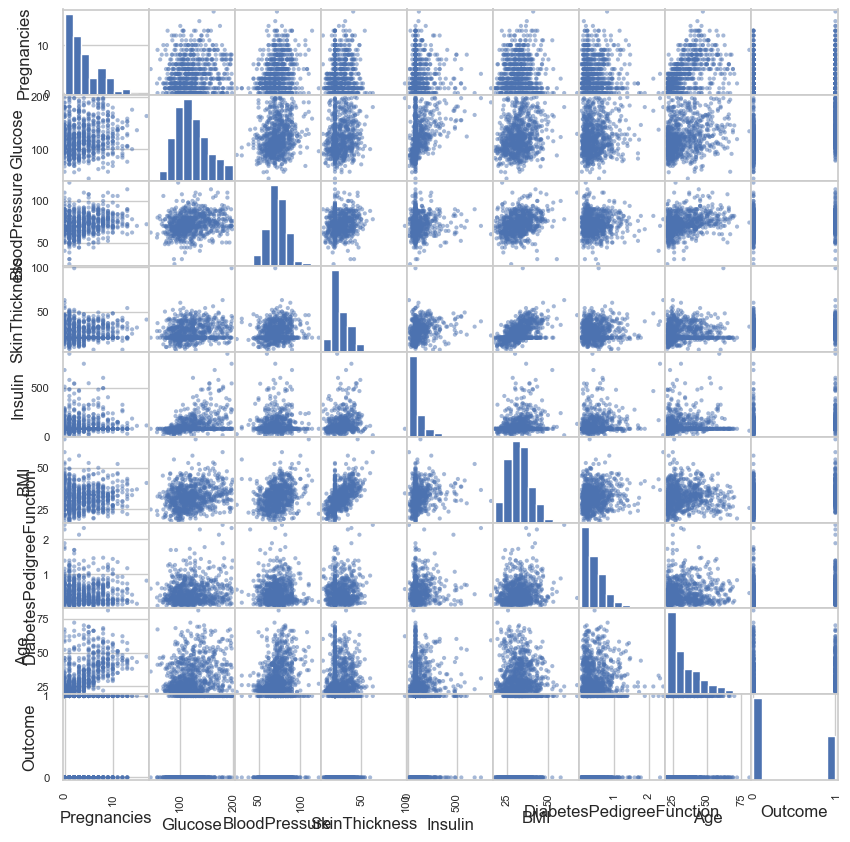

In [37]:
##scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (10,10))
plt.show()

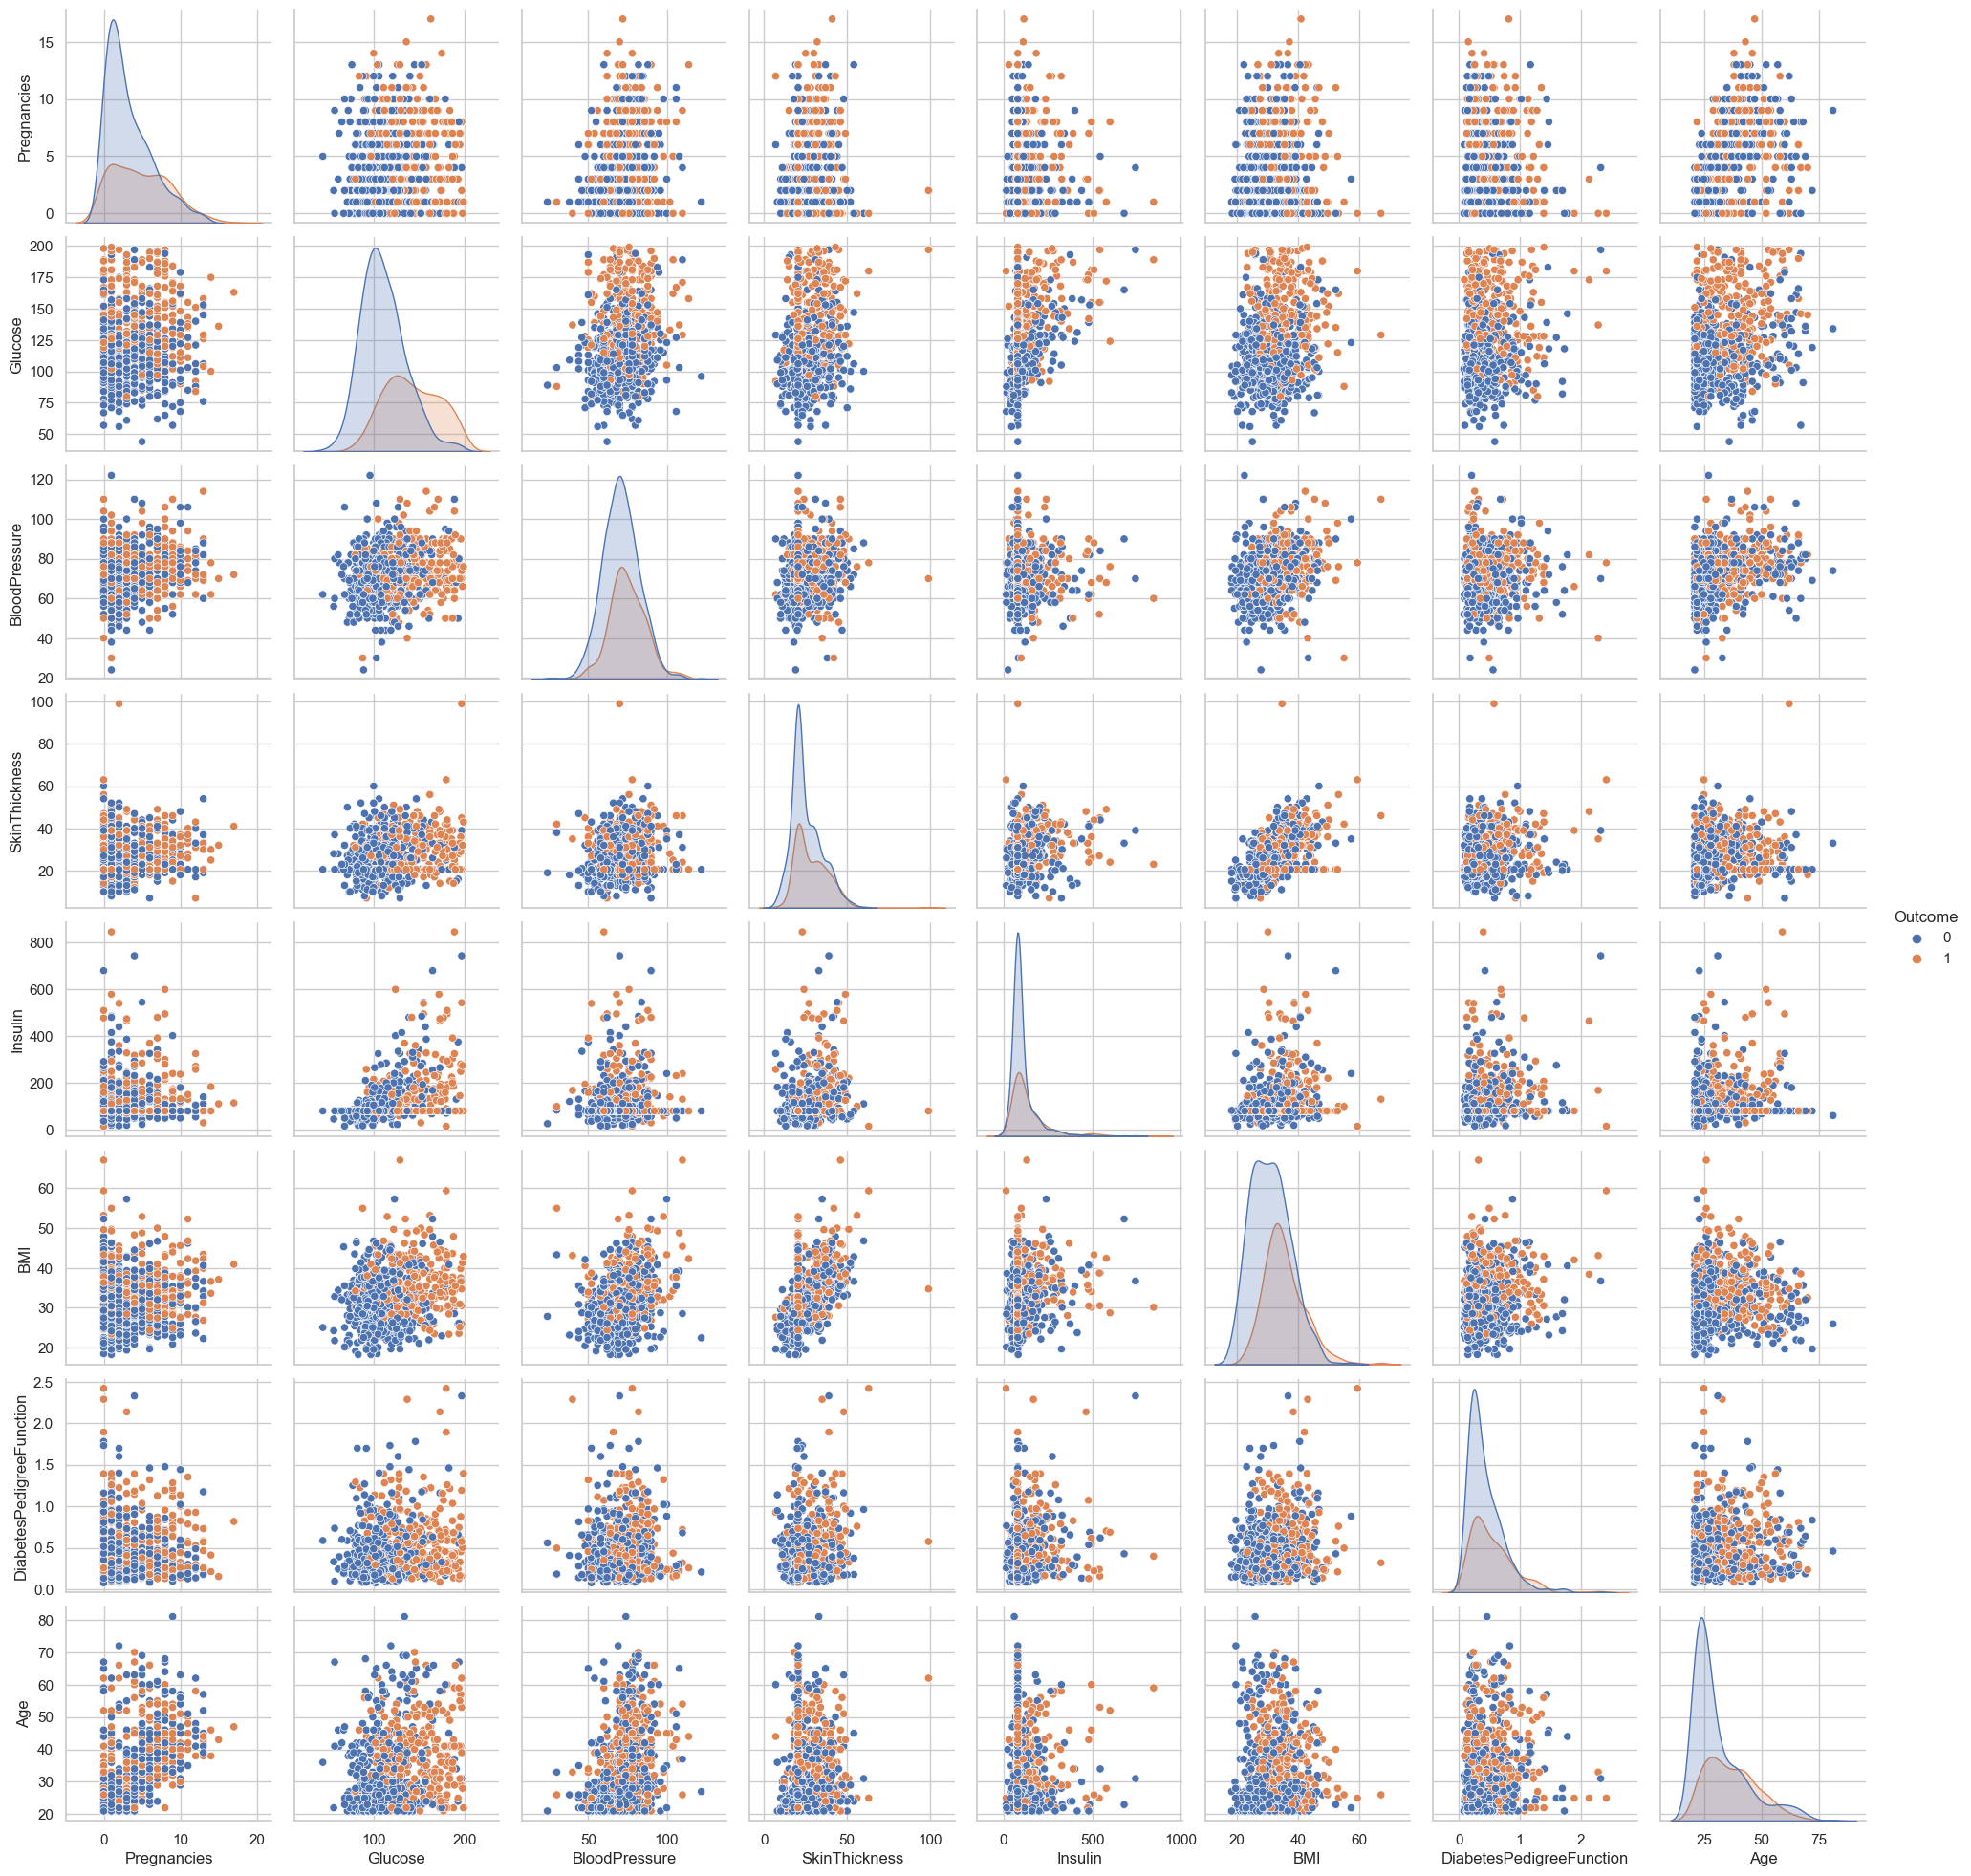

In [38]:
#pairplot
sns.pairplot(data = df, hue = 'Outcome')
plt.show()

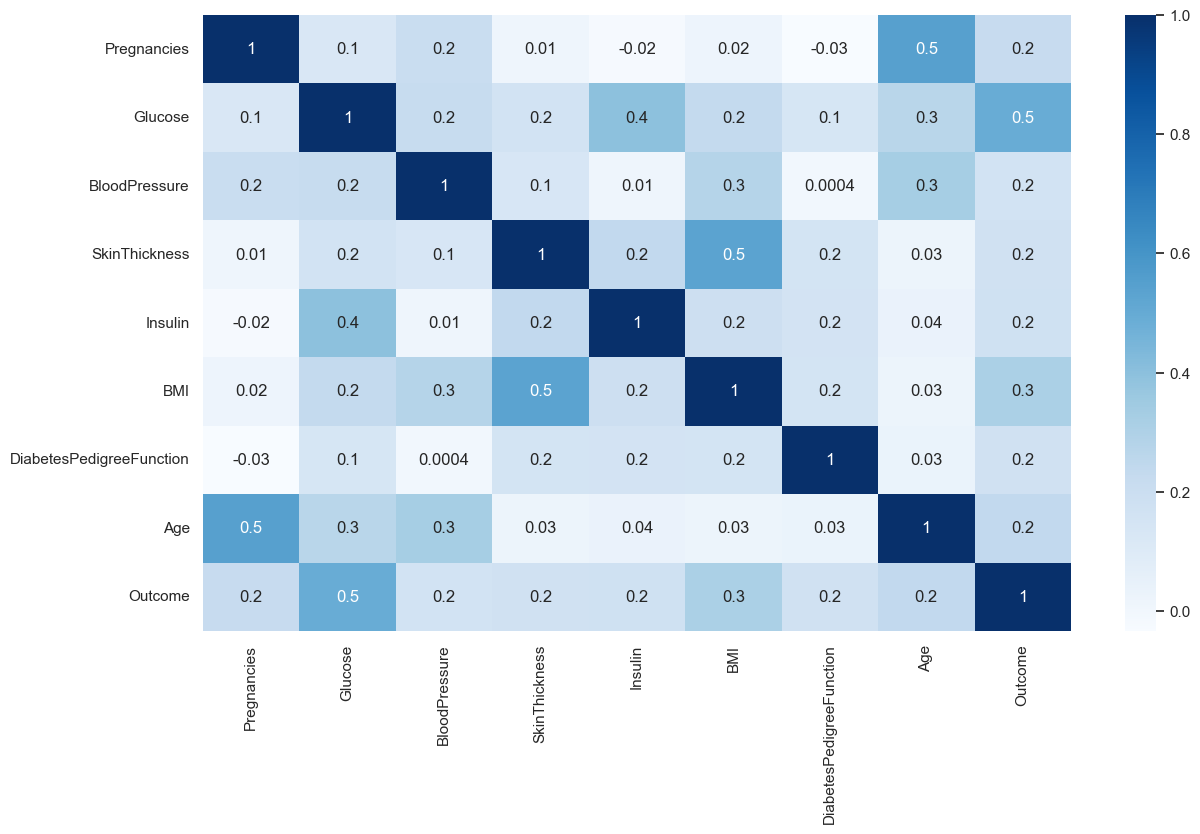

In [39]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()         ####get correlations of each features in dataset
##plot heat map,
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [41]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

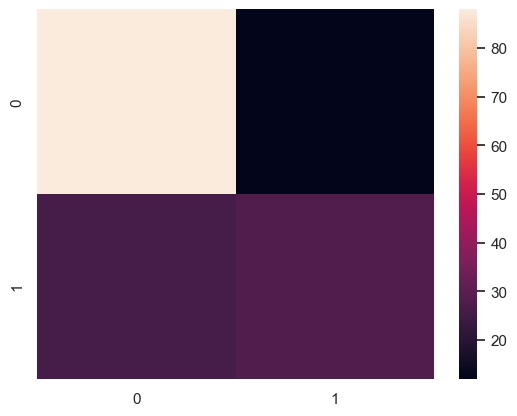

In [46]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import confusion_matrix
model = CatBoostClassifier(verbose=0)
model.fit(X_train, Y_train)
# Predicting the Test set results
y_pred = model.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)

# Plotting the confusion matrix
sns.heatmap(cm)
plt.show()

# build the classification algo

In [89]:
##SUPPORT VECTOR MACHINE
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [90]:
#accuracy score
X_test_prediction = classifier.predict(X_test)
data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('accuracy score:' , data_accuracy)

accuracy score: 0.7792207792207793


In [92]:
##LOGISTIC REGRESSION
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(X_train,Y_train)

LogisticRegression()

In [93]:
X_test_prediction = logr.predict(X_test)
data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('accuracy score:' , data_accuracy)

accuracy score: 0.7597402597402597


In [100]:
##KNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [101]:
X_test_prediction = neigh.predict(X_test)
data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('accuracy score:' , data_accuracy)

accuracy score: 0.7012987012987013


In [114]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
knn = GaussianNB()  
knn.fit(X_train, Y_train) 

GaussianNB()

In [115]:
#accuracy score
X_test_prediction = knn.predict(X_test)
data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('accuracy score:' , data_accuracy)

accuracy score: 0.7272727272727273


In [116]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree = classifier.fit(X_train,Y_train)

In [117]:
#accuracy score
X_test_prediction = decisiontree.predict(X_test)
data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('accuracy score:' , data_accuracy)

accuracy score: 0.7597402597402597


In [118]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier  
Ranfr= RandomForestClassifier()  
Ranfr.fit(X_train, Y_train)  

RandomForestClassifier()

In [119]:
#accuracy score
X_test_prediction = Ranfr.predict(X_test)
data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('accuracy score:' , data_accuracy)

accuracy score: 0.7467532467532467


In [109]:
##cheacking with input data
input_data= (4,110,92,0,0,37.6,0.191,30)
input_data_as_nparrary= np.asarray(input_data)    ##changing the input data as np array
##as the model will expect 768 value, reshapping to make the model understand that its one value
reshape = input_data_as_nparrary.reshape(1,-1) 

In [110]:
new_input = scaler.fit_transform(reshape)

In [112]:
##prediction
prediction =classifier.predict(new_input)
print(prediction)

[0]


In [113]:
if (prediction[0] == 0):
    print ('diabetic')
else:
        print ('non diabetic')

diabetic


In [ ]:
##I have done a full examination on a dataset related to diabetes and basic data analysis.Have detected the outliers with a function that we've coded ourselves and got rid of these outlier values for a better machine learning score and have applied 6 different machine learning algorithms on our data and found out the best one for our dataset.